In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# figure root
fig_root = os.environ['HOME']+'/work/E3SMv1_Future_Projection/figures'
save_fig = True

In [3]:
e3sm_amoc_data = np.load('e3sm_amoc26.npz')
esgf_amoc_data = np.load('esgf_amoc26.npz')

In [4]:
esgf_colors = np.load('cmip6_colors.npz', allow_pickle=True)['esgf_colors'].flat[0]

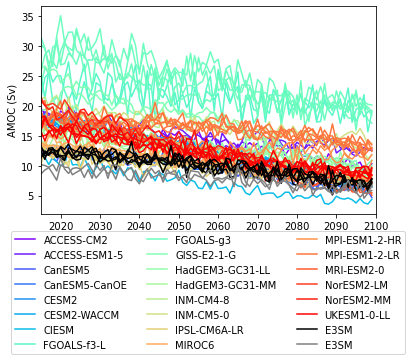

In [5]:
fig = plt.figure(figsize=(6, 6))

esgf_time = esgf_amoc_data['time']
e3sm_time = e3sm_amoc_data['time']
models = []
for i, s in enumerate(esgf_amoc_data['label']):
    esgf_amoc = esgf_amoc_data['data'][i,:]
    lb = s.split('_')[0]
    if lb not in models:
        models.append(lb)
        plt.plot(esgf_time, esgf_amoc, color=esgf_colors[lb], label=lb)
    else:
        plt.plot(esgf_time, esgf_amoc, color=esgf_colors[lb])
    
for i, s in enumerate(e3sm_amoc_data['label']):
    e3sm_amoc = e3sm_amoc_data['data'][i,:]
    if s.startswith('E3SM P'):
        lb = 'E3SM'
        color = 'k'
    elif s.startswith('E3SM GHG'):
        lb = 'E3SM'
        color = 'gray'
    if s.endswith('1'):
        plt.plot(e3sm_time, e3sm_amoc, color=color, label=lb)
    else:
        plt.plot(e3sm_time, e3sm_amoc, color=color)

plt.xlim([2015, 2100])
plt.ylabel('AMOC (Sv)')
plt.legend(loc='lower center',  bbox_to_anchor=(0.5, -0.7), ncol=3)

# plt.tight_layout()
plt.subplots_adjust(bottom=0.4)
# save figure
if save_fig:
    figname = fig_root+'/CMIP6_ScenarioMIP_AMOC.png'
    fig.savefig(figname, dpi = 300)